In [1]:
# importing the necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost

In [2]:
data = pd.read_csv("traffic volume.csv")

In [3]:
data.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,NaN,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,NaN,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,NaN,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,NaN,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,NaN,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


In [4]:
data.describe()

,temp,rain,snow,traffic_volume
count,48151.000000,48202.000000,48192.000000,48204.000000
mean,281.205351,0.334278,0.000222,3259.818355
std,13.343675,44.790062,0.008169,1986.860670
min,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1193.000000
50%,282.460000,0.000000,0.000000,3380.000000
75%,291.810000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         61 non-null     object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


In [6]:
data.isnull().sum()

holiday           48143
temp                 53
rain                  2
snow                 12
weather              49
date                  0
Time                  0
traffic_volume        0
dtype: int64

In [9]:
data['temp'] = data['temp'].fillna(data['temp'].mean())
data['rain'] = data['rain'].fillna(data['rain'].mean())
data['snow'] = data['snow'].fillna(data['snow'].mean())

In [10]:
data.fillna({
    'temp': data['temp'].mean(),
    'rain': data['rain'].mean(),
    'snow': data['snow'].mean()
}, inplace=True)

In [12]:
from collections import Counter
print(Counter(data['weather']))

Counter({'Clouds': 15144, 'Clear': 13383, 'Mist': 5942, 'Rain': 5665, 'Snow': 2875, 'Drizzle': 1818, 'Haze': 1359, 'Thunderstorm': 1033, 'Fog': 912, nan: 49, 'Smoke': 20, 'Squall': 4})


In [14]:
data.fillna({'weather': 'Clouds'}, inplace=True)

In [17]:
cor = data.select_dtypes(include='number').corr()

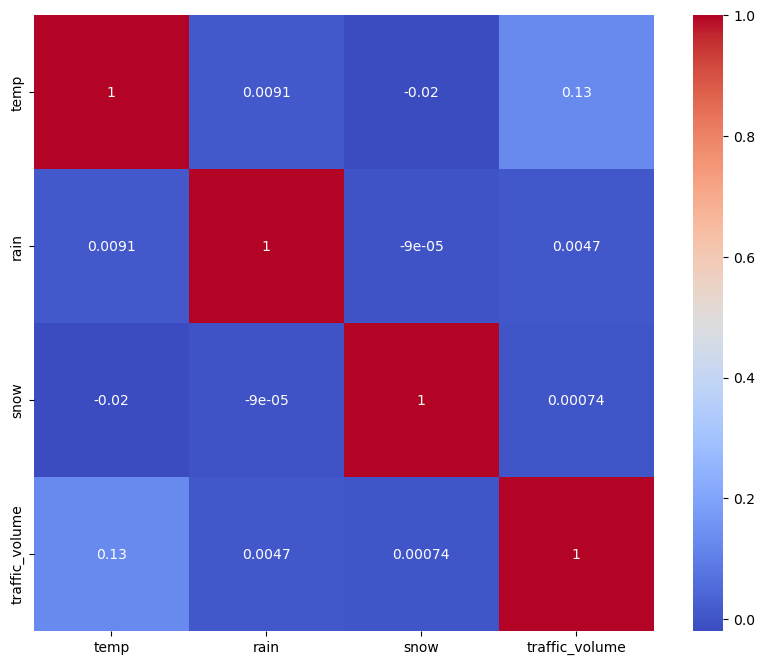

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.show()

In [19]:
data['holiday'] = data['holiday'].astype('category').cat.codes

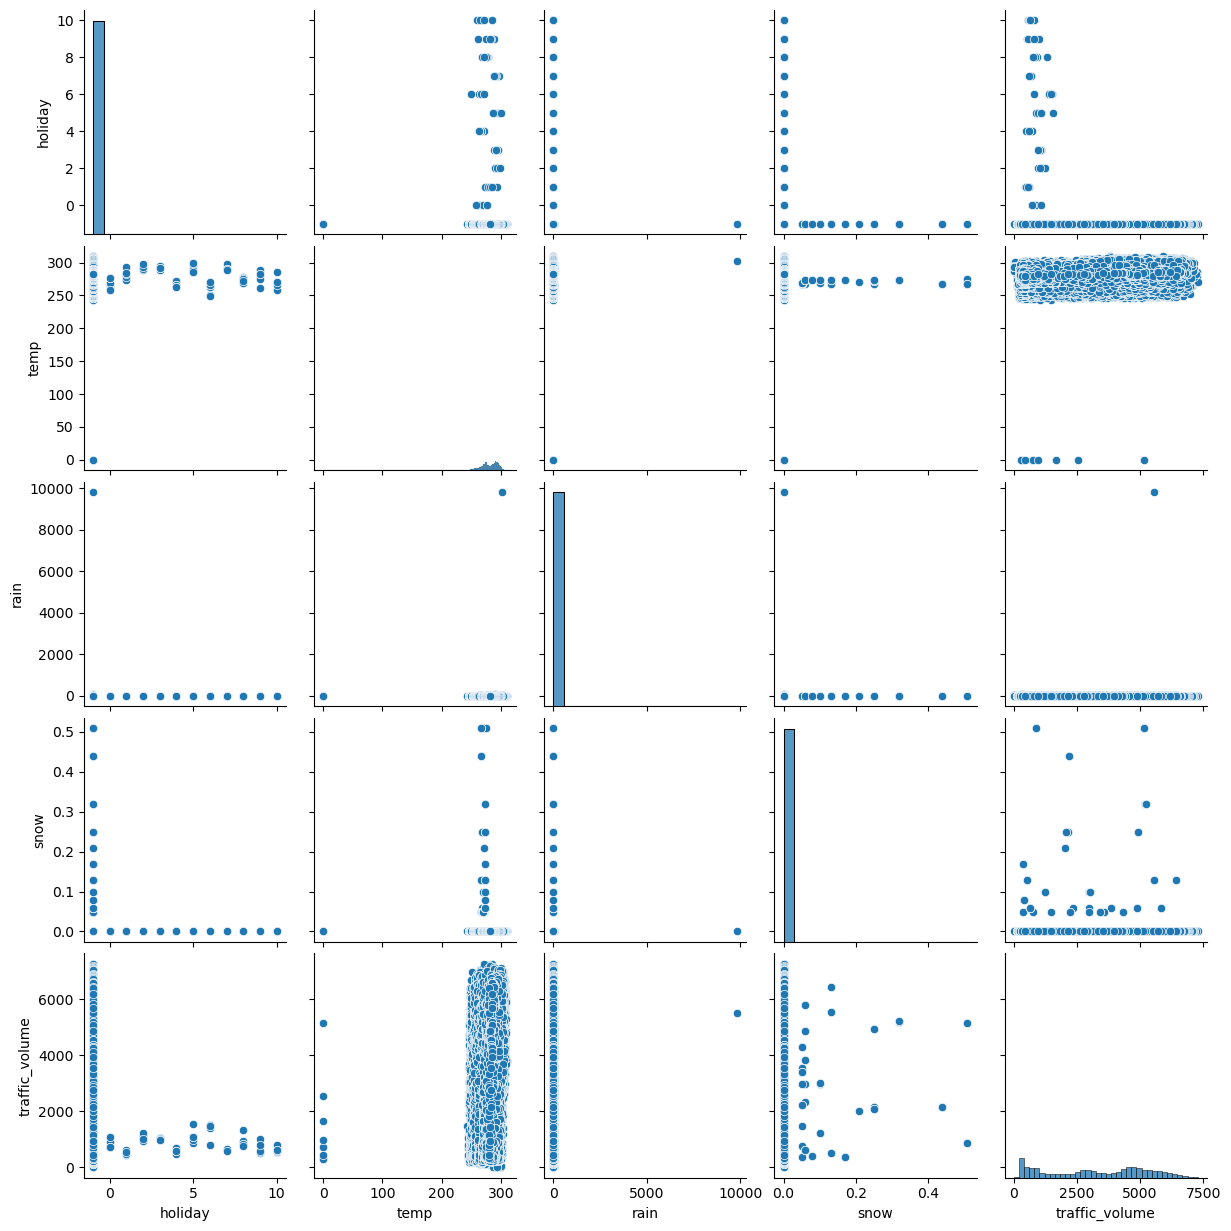

In [20]:
sns.pairplot(data)

In [21]:
y = data['traffic_volume']
x = data.drop(columns=['traffic_volume'], axis=1)

In [32]:
x = pd.get_dummies(x)

In [24]:
names = x.columns

In [33]:
from sklearn.preprocessing import scale
x = scale(x)

In [29]:
x = pd.DataFrame(x, columns=names)
x.head()

,holiday,temp,rain,snow,weather,date,Time
0,-1,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00
1,-1,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00
2,-1,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00
3,-1,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00
4,-1,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00


In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [35]:
from sklearn import linear_model      
from sklearn import tree               
from sklearn import ensemble           
from sklearn import svm                
import xgboost                         

In [36]:
lin_reg = linear_model.LinearRegression()
Dtree = tree.DecisionTreeRegressor()
Rand = ensemble.RandomForestRegressor()
svr = svm.SVR()
XGB = xgboost.XGBRegressor()

In [38]:
lin_reg.fit(x_train, y_train)
Dtree.fit(x_train, y_train)
Rand.fit(x_train, y_train)
svr.fit(x_train, y_train)
XGB.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
p1 = lin_reg.predict(x_train)
p2 = Dtree.predict(x_train)
p3 = Rand.predict(x_train)
p4 = svr.predict(x_train)
p5 = XGB.predict(x_train)

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
print("Linear Regression MAE:", mean_absolute_error(y_train, p1))
print("Linear Regression R²:", r2_score(y_train, p1))

In [ ]:
from sklearn.metrics import r2_score
train_r2_lin = r2_score(y_train, lin_reg.predict(x_train))
test_r2_lin = r2_score(y_test, lin_reg.predict(x_test))
print("Linear Regression - R² Train:", train_r2_lin)
print("Linear Regression - R² Test:", test_r2_lin)


In [ ]:
from sklearn import metrics
print(metrics.r2_score(p1, y_train))  
print(metrics.r2_score(p2, y_train))  
print(metrics.r2_score(p3, y_train)) 
print(metrics.r2_score(p4, y_train))  
print(metrics.r2_score(p5, y_train))  


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn import metrics
from sklearn import linear_model, tree, ensemble, svm
import xgboost

In [ ]:
y = data['traffic_volume']
x = data.drop(columns=['traffic_volume'], axis=1)
x = x.select_dtypes(include=['number'])
names = x.columns
x = scale(x)
x = pd.DataFrame(x, columns=names)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
lin_reg = linear_model.LinearRegression()
Dtree = tree.DecisionTreeRegressor()
Rand = ensemble.RandomForestRegressor()
svr_model = svm.SVR()
XGB = xgboost.XGBRegressor()
lin_reg.fit(x_train, y_train)
Dtree.fit(x_train, y_train)
Rand.fit(x_train, y_train)
svr_model.fit(x_train, y_train)
XGB.fit(x_train, y_train)

In [ ]:
p1_train = lin_reg.predict(x_train)
p2_train = Dtree.predict(x_train)
p3_train = Rand.predict(x_train)
p4_train = svr_model.predict(x_train)
p5_train = XGB.predict(x_train)
p1_test = lin_reg.predict(x_test)
p2_test = Dtree.predict(x_test)
p3_test = Rand.predict(x_test)
p4_test = svr_model.predict(x_test)
p5_test = XGB.predict(x_test)
print("Train R² Scores:")
print("Linear:", metrics.r2_score(y_train, p1_train))
print("Decision Tree:", metrics.r2_score(y_train, p2_train))
print("Random Forest:", metrics.r2_score(y_train, p3_train))
print("SVM:", metrics.r2_score(y_train, p4_train))
print("XGBoost:", metrics.r2_score(y_train, p5_train))
print("\nTest R² Scores:")
print("Linear:", metrics.r2_score(y_test, p1_test))
print("Decision Tree:", metrics.r2_score(y_test, p2_test))
print("Random Forest:", metrics.r2_score(y_test, p3_test))
print("SVM:", metrics.r2_score(y_test, p4_test))
print("XGBoost:", metrics.r2_score(y_test, p5_test))

In [ ]:
import pickle
pickle.dump(Rand, open("model.pkl", 'wb'))
pickle.dump(le, open("encoder.pkl", 'wb'))